### fitting J mag, H mag, Ks mag, and parallax

In [29]:
from jaxstar import mistfit
from jax import random
import arviz, corner
import pandas as pd

In [30]:
%matplotlib inline

In [31]:
mf = mistfit.MistFit()

In [32]:
# observed Kmag, Teff, Fe/H, parallax (mas)
jmag_obs, jmag_err, hmag_obs, hmag_err, kmag_obs, kmag_err, parallax_obs, parallax_err\
= [ 6.258, 0.027, 5.576, 0.034, 5.364, 0.021, 2.1748371606513834, 0.03310597]

In [33]:
# probably need to know Fe/H for accurete modeling
feh_est, feh_err = -1, 1

In [34]:
mf.set_data(['jmag', 'hmag', 'kmag', 'parallax', 'feh'],\
            [jmag_obs, hmag_obs, kmag_obs, parallax_obs, feh_est],\
            [jmag_err, hmag_err, kmag_err, parallax_err, feh_err])

In [35]:
# setup HMC
ns = 20000
mf.setup_hmc(num_warmup=ns, num_samples=ns)

In [36]:
# run
rng_key = random.PRNGKey(0)
mf.run_hmc(rng_key, linear_age=True, flat_age_marginal=False, nodata=False)

sample: 100%|████████████████████████████████████████████| 40000/40000 [00:20<00:00, 1971.72it/s, 255 steps of size 2.61e-02. acc. prob=0.91]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
       age      5.19      2.97      4.21      1.78      9.96   1267.34      1.00
  distance      0.46      0.01      0.46      0.45      0.47   1532.67      1.00
       eep    544.27      2.01    543.92    541.41    547.49   1663.02      1.00
       feh      0.17      0.20      0.19     -0.11      0.50   1829.12      1.00

Number of divergences: 106


In [37]:
mcmc = mf.mcmc
samples = mf.samples

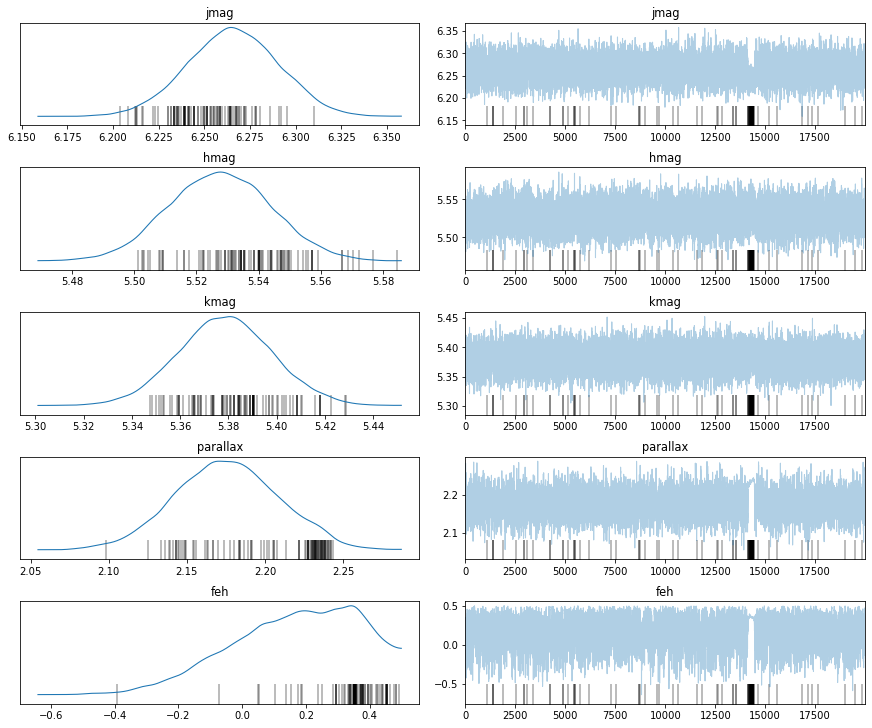

In [38]:
# trace plot
fig = arviz.plot_trace(mcmc, var_names=mf.obskeys)

In [39]:
# keys and observed values for corner plot
outkeys = mf.obskeys + ['mass', 'radius', 'age', 'teff', 'logg', 'eep']
obsvals = mf.obsvals + [None] * (len(outkeys) - len(mf.obskeys))

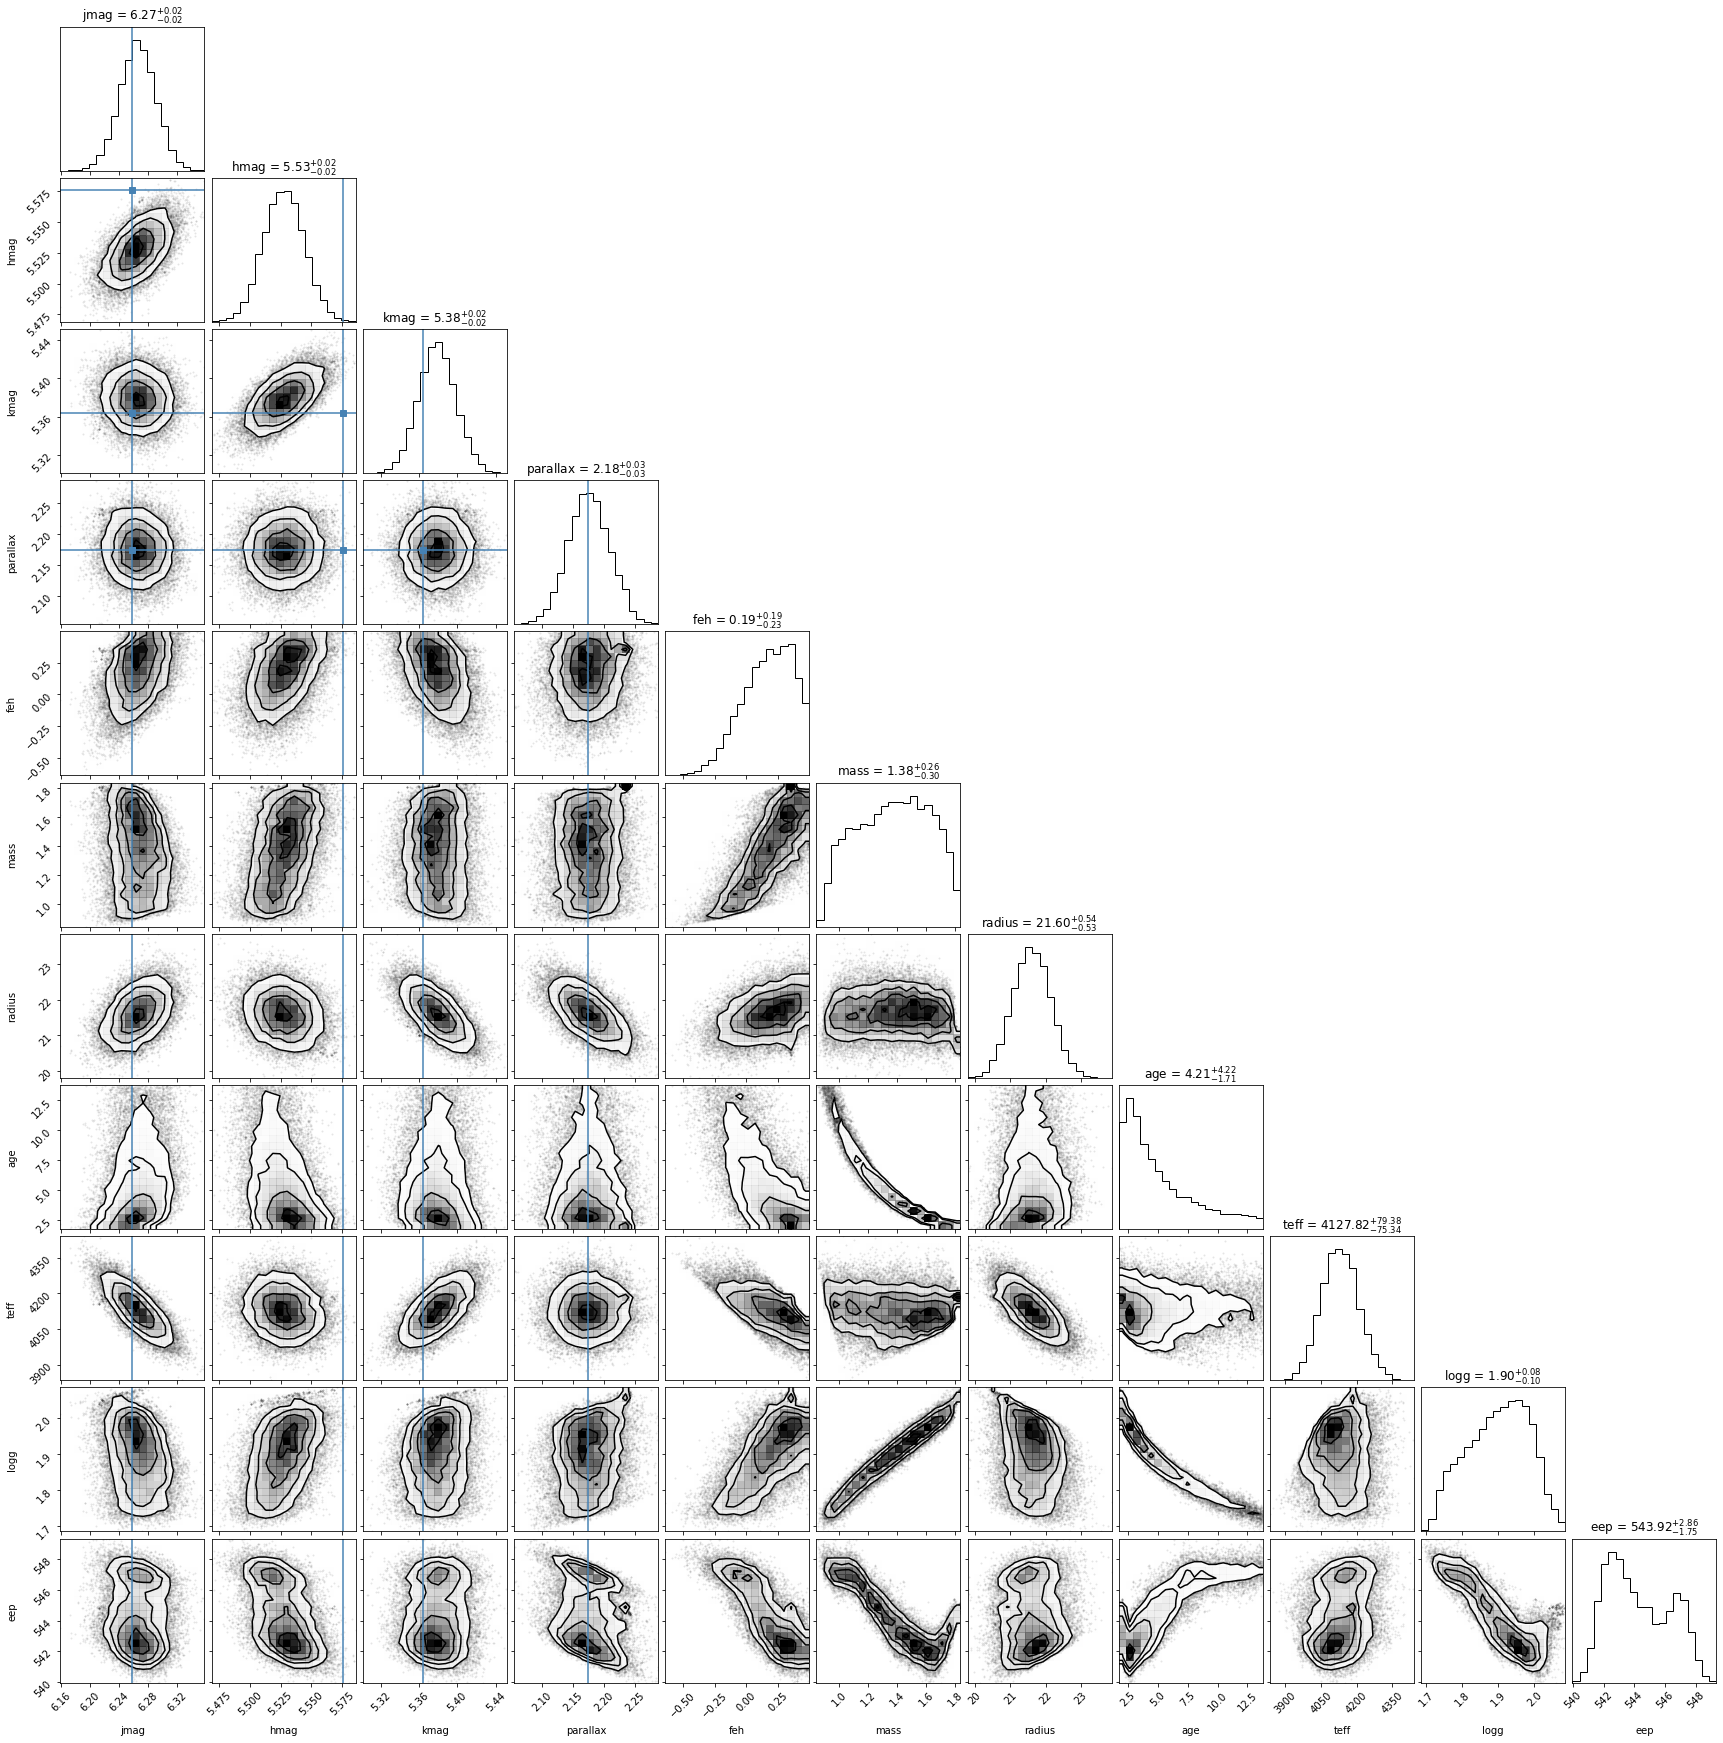

In [40]:
params = pd.DataFrame(data=dict(zip(outkeys, [samples[k] for k in outkeys])))
fig = corner.corner(params, show_titles="%.2f", truths=obsvals)